In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [2]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV
G=3.881

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$

energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$

$||\frac{\partial \Omega}{\partial\phi}||=|\frac{\phi}{2G}-\frac{6}{\pi^2}\int_0^\infty dx\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}\{1-\frac{1}{1+e^(E-\mu)/T}-\frac{1}{1+e^{(E+\mu)/T}}\}|\rightarrow \\\qquad|\ \phi-\frac{12\cdot G}{\pi^2}\int_0^\infty\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}\Theta(E-\mu)|$

$\Omega=\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty x^2dx\{E(x,\phi)-E(x,\phi_0)+T\ln(1+e^{-\frac{E-\mu}T})+T\ln(1+e^{-\frac{E+\mu}T})\}\rightarrow \\\qquad\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty x^2dx\{E(x,\phi)-E(x,\phi_0)+\Theta(\mu-E(x,\phi))(\mu-E(x,\phi)\}$

In [3]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E
def Theta(x):
    if x>0:
        return 1
    else:
        return 0
def Log_p(x,phi,mu,T):
    L = 0
    if (T):
        e_p = math.exp(-(E(x,phi)+mu)/T)
        L += T*math.log(1+e_p)
    return L
def Log_m(x,phi,mu,T):
    if (T):
        e_m = math.exp(-(E(x,phi)-mu)/T)
        L = T*math.log(1+e_m)
    else:
        L=(mu-E(x,phi))*Theta(mu-E(x,phi))
    return L
def integrand(x,phi,mu,T):
    Func=6/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    if(T):
        Func*=(1-math.exp(-(E(x,phi)-mu)/T)/(math.exp(-(E(x,phi)-mu)/T)+1)-math.exp(-(E(x,phi)+mu)/T)/(math.exp(-(E(x,phi)+mu)/T)+1))
    else:
        Func*=Theta(E(x,phi)-mu)
    return Func

def D(phi,mu,T):
    N,err=integrate.quad(integrand,0,np.inf,args=(phi,mu,T))
    N=phi/2/G-N
    return N
    
def phi0(T):
    func=lambda x: D(x,0,T)
    z=optimize.root(func,0.368,tol=1e-8)
    return z.x[0]

def Mu(phi,T,fp):
    func=lambda x: D(phi,x,T)
    z=optimize.root(func,fp,tol=1e-8)
    return z.x[0]
def Omega(phi,mu,T):
    ph0=phi0(T)
    Om=(phi*phi-ph0*ph0)/4/G
    Integrand=lambda x: x*x*(E(x,phi)-E(x,ph0)+Log_p(x,phi,mu,T)+Log_m(x,phi,mu,T))
    Int,err=integrate.quad(Integrand, 0, np.inf)
    Int*=-6/math.pi/math.pi
    Om+=Int
    return Om

In [4]:
#найдем mu_star
n=100
#Т_крит примерно 0.01
Tc=0
mu_star=[]
TT=[]
T_range=np.linspace(0,0.1,n)
crit=1
k=0
while(k<n)and(crit):
    l=phi0(T_range[k])-0.02
    eps=l/n
    start=phi0(T_range[k])-eps
    mu0=Mu(start,T_range[k],0.37)
    phi_range=np.linspace(phi0(T_range[k]),0.02,n)
    mu_range=[]
    for phi in phi_range:
        if phi==phi0(T_range[k]):
            mu_range.append(0)
        else:
            mu0=Mu(phi,T_range[k],mu0)
            mu_range.append(mu0)
    #расчет давления
    P=[]
    for i in range(n):
        P.append(-Omega(phi_range[i],mu_range[i],T_range[k]))
    #найдем mu_star
    i=0
    while(i<n)and(crit):
        if(P[i]>0)and(P[i-1]<0):
            if(mu_range[i]<mu_range[1]):
                mu_star.append(mu_range[i])
                TT.append(T_range[k])
            else:
                print("1")
                Tc=T_range[k]
                crit=0
        i+=1
    k+=1

1


In [5]:
#расчет phi и mu
n=500
l0=phi0(0)-0.02
l1=phi0(T_range[30])-0.02
l2=phi0(T_range[31])-0.02
l3=phi0(T_range[32])-0.02
eps0=l0/n
eps1=l1/n
eps2=l2/n
eps3=l3/n
start0=phi0(0)-eps1
start1=phi0(T_range[31])-eps1
start2=phi0(T_range[32])-eps2
start3=phi0(T_range[33])-eps3
mu00=Mu(start0,0,0.37)
mu01=Mu(start1,T_range[31],0.37)
mu02=Mu(start2,T_range[32],0.37)
mu03=Mu(start3,T_range[33],0.37)
phi0_range=np.linspace(phi0(0),0.02,n)
phi1_range=np.linspace(phi0(T_range[31]),0.02,n)
phi2_range=np.linspace(phi0(T_range[32]),0.02,n)
phi3_range=np.linspace(phi0(T_range[33]),0.02,n)
mu0_range=[]
mu1_range=[]
mu2_range=[]
mu3_range=[]
for phi in phi0_range:
    if phi==phi0(0):
        mu0_range.append(0)
    else:
        mu00=Mu(phi,0,mu00)
        mu0_range.append(mu00)
for phi in phi1_range:
    if phi==phi0(T_range[31]):
        mu1_range.append(0)
    else:
        mu01=Mu(phi,T_range[31],mu01)
        mu1_range.append(mu01)
for phi in phi2_range:
    if phi==phi0(T_range[32]):
        mu2_range.append(0)
    else:
        mu02=Mu(phi,T_range[32],mu02)
        mu2_range.append(mu02)
for phi in phi3_range:
    if phi==phi0(T_range[33]):
        mu3_range.append(0)
    else:
        mu03=Mu(phi,T_range[33],mu03)
        mu3_range.append(mu03)
        #расчет давления
P0=[]
P1=[]
P2=[]
P3=[]
for i in range(n):
    P0.append(-Omega(phi0_range[i],mu0_range[i],0))
    P1.append(-Omega(phi1_range[i],mu1_range[i],T_range[31]))
    P2.append(-Omega(phi2_range[i],mu2_range[i],T_range[32]))
    P3.append(-Omega(phi3_range[i],mu3_range[i],T_range[33]))

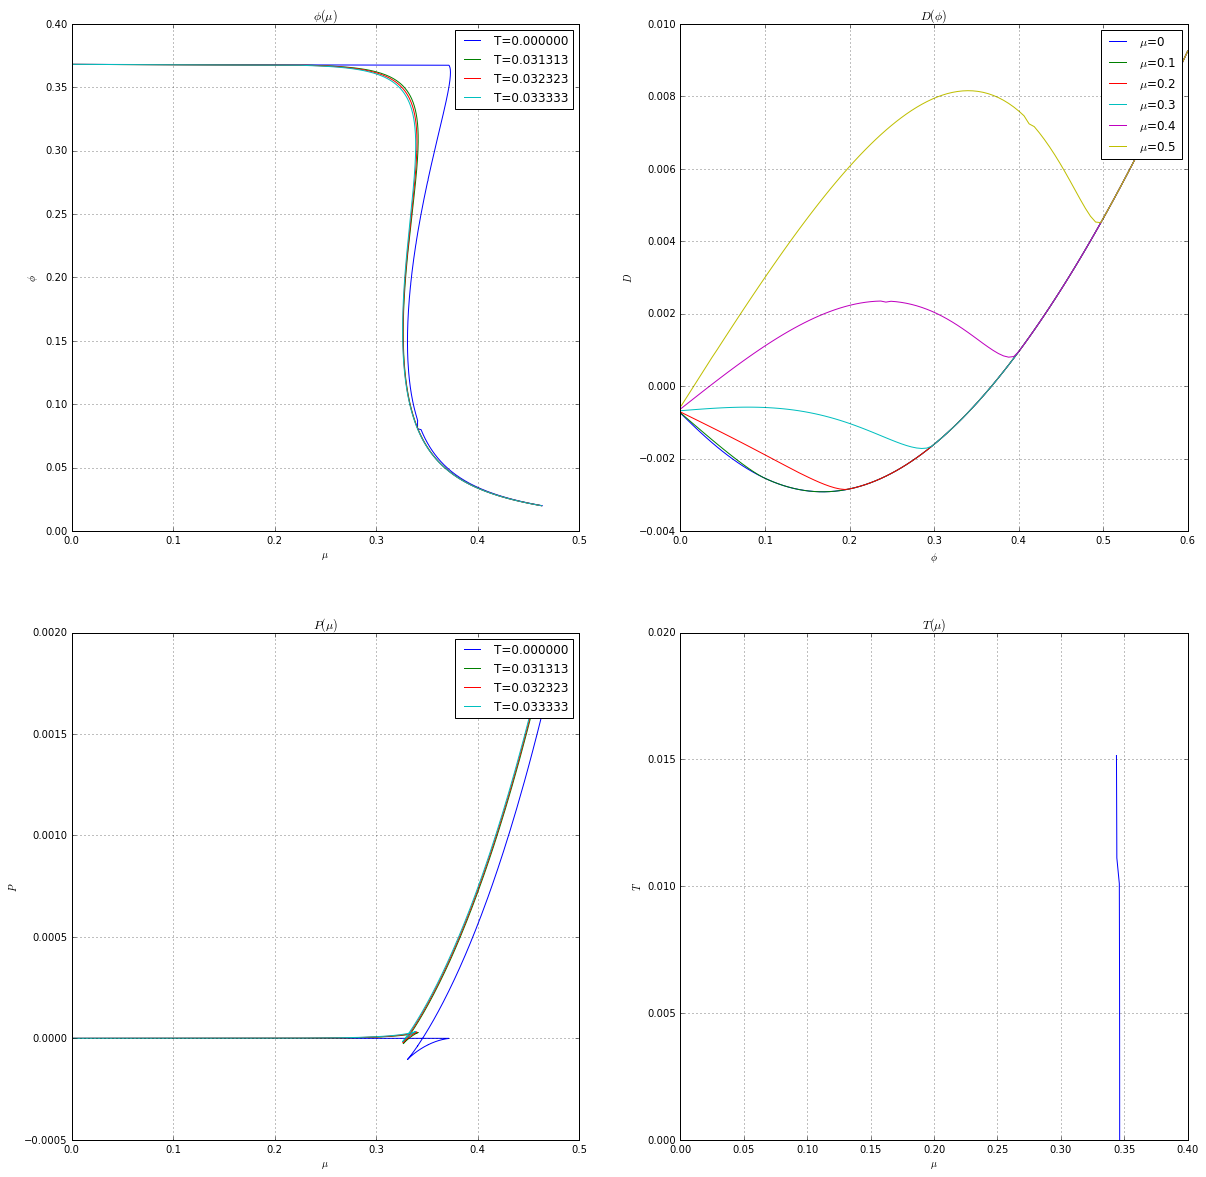

In [20]:
plt.figure(figsize=(20,20))
plt.subplot (2, 2, 1)
plt.plot (mu0_range,phi0_range,label='T=%f'%0)
plt.plot (mu1_range,phi1_range,label='T=%f'%T_range[31])
plt.plot (mu2_range,phi2_range,label='T=%f'%T_range[32])
plt.plot (mu3_range,phi3_range,label='T=%f'%T_range[33])
plt.legend()

plt.title ('$\phi(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$\phi$')
plt.grid(1)

plt.subplot (2, 2, 2)
x_range=np.linspace(0.001,0.6,100)
plt.grid(1)
for i in range(0,6):
    k=i/10
    plt.plot(x_range, [D(phi,k,0) for phi in x_range], label='$\mu$=%g' % k)
plt.title ('$D(\phi)$')
plt.ylabel('$D$')
plt.xlabel('$\phi$')
plt.legend()

plt.subplot (2, 2, 3)
plt.grid(1)
plt.plot (mu0_range,P0,label='T=%f'%0)
plt.plot (mu1_range,P1,label='T=%f'%T_range[31])
plt.plot (mu2_range,P2,label='T=%f'%T_range[32])
plt.plot (mu3_range,P3,label='T=%f'%T_range[33])
plt.title ('$P(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$P$')
plt.legend()

plt.subplot (2, 2, 4)
plt.grid(1)
plt.plot (mu_star,TT)
plt.title ('$T(\mu)$')
plt.xlabel('$\mu$')
plt.ylabel('$T$')
plt.xlim(0,.40)
plt.ylim(0,0.02)
plt.show()

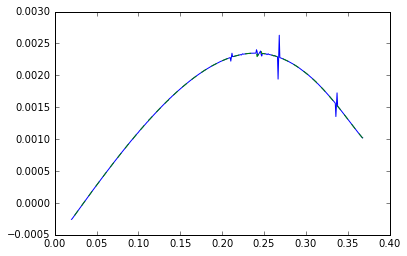

In [77]:
mu=0.4
Om=[]
for i in range(n):
    Om.append(Omega(phi_range[i],mu,0))
plt.plot(phi_range,np.gradient(Om)/np.gradient(phi_range))
DD=[]
for i in range(n):
    DD.append(D(phi_range[i],mu,0))
plt.plot(phi_range,DD,'--')

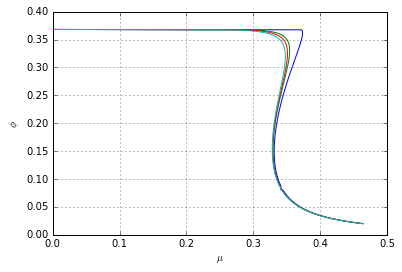

In [14]:
plt.xlabel('$\mu$')
plt.ylabel('$\phi$')
plt.grid(True)
plt.plot(mu0_range,phi0_range)
plt.plot(mu1_range,phi1_range)
plt.plot(mu2_range,phi2_range)
plt.plot(mu3_range,phi3_range)

In [19]:
m0=[]
m1=[]
m2=[]
m3=[]
l0=[]
l1=[]
l2=[]
l3=[]
for i in range(n):
    if (mu0_range[i]>0.3)and(mu0_range[i]<0.4):
        m0.append(mu0_range[i])
        l0.append(P0[i])
    if (mu1_range[i]>0.3)and(mu1_range[i]<0.4):
        m1.append(mu1_range[i])
        l1.append(P1[i])
    if (mu2_range[i]>0.3)and(mu2_range[i]<0.4):
        m2.append(mu2_range[i])
        l2.append(P2[i])
    if (mu3_range[i]>0.3)and(mu3_range[i]<0.4):
        m3.append(mu3_range[i])
        l3.append(P3[i])

$p(\mu^*)=0 \rightarrow p=\frac{\mu^2}{2\pi^2}-B=\frac{\mu^2-\mu^{*2}}{2\pi^2}\\
B=\frac{\mu^{*2}}{2\pi^2}$